In [1]:
from IPython.display import Markdown
import os

dataset_name = os.environ.get("DATASET")
display(Markdown(f"# Raport EDA: Zbiór **{dataset_name}**"))

# Raport EDA: Zbiór **movies**

*Author: Szymon Stano*

The purpose of this report is to conduct a basic exploratory data analysis of the dataset, as a preliminary step for training a sentiment analysis model.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import yaml

sns.set_theme()

In [3]:
with open("/app/params.yaml") as f:
    params = yaml.safe_load(f)
dataset_name = os.environ.get("DATASET")


input_path = f"/app/data/train_test/{dataset_name}_train_data.csv"
df = pd.read_csv(input_path, engine="python")

dataset_cfg = params["datasets"][dataset_name]
class_column = dataset_cfg["label_column"]

## 1. Basic Data Analysis

In [4]:
df.shape

(8529, 2)

Text(0.5, 1.0, 'Rozkład klas')

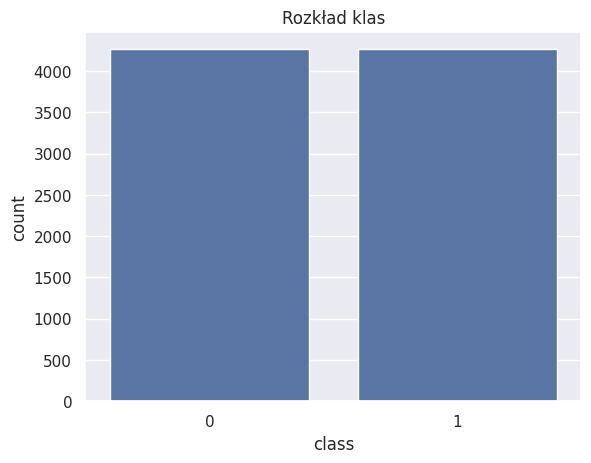

In [5]:
sns.countplot(x=df[class_column])
plt.title("Rozkład klas")

Below are example samples from the dataset.

In [6]:
pd.set_option("display.max_columns", None)
df.sample(3)

,text,class
213,stiff and schmaltzy and clumsily directed .,0
8006,"eventually arrives at its heart , as simple se...",0
6926,"more concerned with overall feelings , broader...",1


As part of the analysis of feature types and their approximate distributions, a report was generated using the `ydata-profiling` library. It presents basic statistics for each feature in the data.

In [7]:
profile = ProfileReport(df, title="Raport Profilowania", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


  0%|                                                                                                                     | 0/2 [00:00<?, ?it/s]


 50%|██████████████████████████████████████████████████████▌                                                      | 1/2 [00:00<00:00,  4.52it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  8.87it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Missing Data Plot
Below is a chart showing the proportion of missing values for each feature.

Text(0.5, 1.0, 'Proporcja brakujących danych')

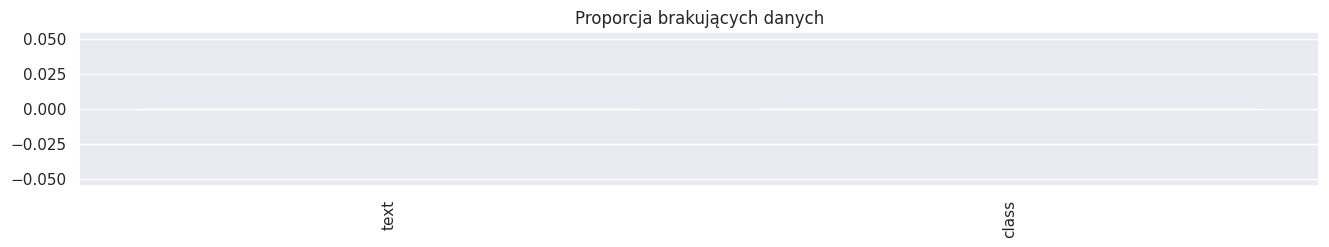

In [8]:
plt.figure(figsize=(16, 2))
plt.xticks(rotation=90)
sns.barplot(df.isnull().sum() / len(df))
plt.title("Proporcja brakujących danych")

#### Correlation Matrix

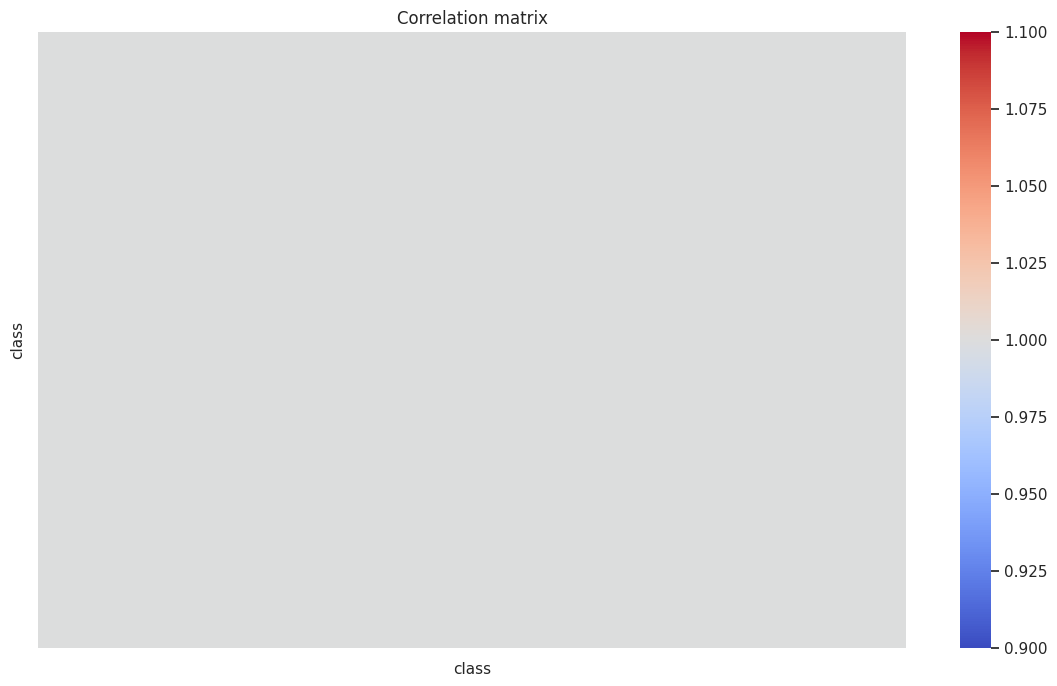

In [9]:
df_all_numeric = df.select_dtypes(include=["int64", "float64"])
correlation_matrix = df_all_numeric.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f")

plt.title("Correlation matrix")
plt.show()